# Q1 - Descriptives

In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("HTTP")
Pkg.add("DataFrames")
Pkg.add("NamedArrays")
Pkg.add("Statistics")

using CSV
using HTTP
using DataFrames
using NamedArrays
using Statistics

    Updating registry at `C:\Users\ALBERTO TRELLES\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Chang

In [2]:
#Loading data from Github
url = "https://raw.githubusercontent.com/gsbDBI/ExperimentData/master/eSTI/processed_data/processed_esti.csv"
response = HTTP.get(url)
data = CSV.read(IOBuffer(response.body), DataFrame)

#filtered_data = filter(row -> row.gender_transgender == 1, data)
count(row -> row.gender_transgender == 1, eachrow(data))  #only 4 transgender people
df_treat = filter(row -> row.w == 1, data)
df_control = filter(row -> row.w==0, data)

Row,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
2,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
3,0,0,0,1,0,0,1,0,0,0,0,1,0,21,2
4,0,0,0,1,0,0,0,0,0,1,0,1,1,28,3
5,1,0,1,0,0,0,0,0,0,1,0,1,0,24,2
6,1,0,0,1,0,0,0,0,0,1,0,0,0,22,2
7,1,0,0,1,0,1,0,0,0,0,0,1,0,19,6
8,0,0,1,0,0,0,0,0,0,1,0,0,0,22,2
9,0,0,1,0,0,0,0,1,0,0,1,1,0,19,3


we'll  store results in a matrix

In [3]:
#----------------------#
#---Balance table------#
#----------------------#
ntreat = size(df_treat)[1]
ncontrol = size(df_control)[1]

#we'll consider the following variables: y, gender_male, ethnicgrp_white, partners1, age, and imd_decile
varlist_treat = [df_treat[:, :y],
                    df_treat[:, :gender_male],
                    df_treat[:, :ethnicgrp_white],
                    df_treat[:, :partners1],
                    df_treat[:, :age],
                    df_treat[:, :imd_decile]]
varlist_control = [df_control[:, :y],
                    df_control[:, :gender_male],
                    df_control[:, :ethnicgrp_white],
                    df_control[:, :partners1],
                    df_control[:, :age],
                    df_control[:, :imd_decile]]

varlist_control[1]

#---Making Table---#
table = NamedArray(zeros(6, 8))
for i in 1:size(varlist_control)[1]

    #Treated
    table[i,2] = ntreat
    table[i,3] = mean(varlist_treat[i])
    table[i,4] = std(varlist_treat[i])

    #Control
    table[i,5] = ntreat
    table[i,6] = mean(varlist_control[i])
    table[i,7] = std(varlist_control[i])

    #Diff
    table[i,8] = mean(varlist_treat[i]) - mean(varlist_control[i])

end

Here are the results

In [4]:
#---Results---#
T = DataFrame(table, [ :"Variables", :"n (treat)", :"Treatment mean", :"sd (treat)", :"n (control)", :"Control mean", :"sd (control)", :"Diff"]) 
T[!,:Variables] = string.(T[!,:Variables]) 

T[1,1] = "y (any STI test)"
T[2,1] = "Male (=1 if male)"
T[3,1] = "White (=1 if white)"
T[4,1] = "Partners (=1 if person has one partner)"
T[5,1] = "Age (years)"
T[6,1] = "Multiple derivation index (decile)"

println(T)

6×8 DataFrame
 Row │ Variables                          n (treat)  Treatment mean  sd (treat)  n (control)  Control mean  sd (control)  Diff        
     │ String                             Float64    Float64         Float64     Float64      Float64       Float64       Float64     
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ y (any STI test)                       921.0        0.476656    0.499726        921.0      0.211491      0.408616   0.265164
   2 │ Male (=1 if male)                      921.0        0.409338    0.491979        921.0      0.418093      0.493547  -0.00875523
   3 │ White (=1 if white)                    921.0        0.753529    0.43119         921.0      0.742054      0.437772   0.011475
   4 │ Partners (=1 if person has one p…      921.0        0.30076     0.458838        921.0      0.292176      0.455041   0.008584
   5 │ Age (years)                            921.0

# Q2 - Linear Regression analysis

In [5]:
import Pkg
Pkg.add("GLM")
Pkg.add("StatsBase")
Pkg.add("Plots")
#Pkg.add("GR")

using GLM
using StatsBase
using Plots
#using GR

   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`


#### (2.1) Regression Y ~ T

In [6]:
#---(1) Y ~ T------#
exp = @formula(y ~ w)
model1 = lm(exp, data)

b1 = coef(model1)[2]
se1 = stderror(model1)[2]
ci1 = confint(model1)[2, :]

2-element Vector{Float64}:
 0.22190006179194519
 0.30842867092921233

In [7]:
model1

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + w

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.211491   0.0160531  13.17    <1e-37   0.180006   0.242977
w            0.265164   0.0220586  12.02    <1e-31   0.2219     0.308429
────────────────────────────────────────────────────────────────────────

Interpretation: Receiving 1 text message with the web link of an e-STI testing (treatment group) increases the probability of taking a STI test by 0.265 porcentage points (pp) in avarage, compared to those who recieved 1 text message with the web link of a bespoke website listing the locations, contact details, and websites of 7 local sexual health clinics (control 
group. This effect is significant at the 99% confidence level. )

From now on, we'll just refer to these groups as treatment and control

#### (2.2) Regression Y ~ T + X 

In [8]:
#we'll consider the following variables: y, gender_male, ethnicgrp_white, partners1, age, and imd_decile
exp = @formula(y ~ w + gender_male + ethnicgrp_white + partners1 + age + imd_decile)
model2 = lm(exp, data)

b2 = coef(model2)[2]
se2 = stderror(model2)[2]
ci2 = confint(model2)[2, :]

2-element Vector{Float64}:
 0.2197188110823285
 0.304966463072013

In [9]:
model2

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + w + gender_male + ethnicgrp_white + partners1 + age + imd_decile

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)      -0.11395     0.0793721   -1.44    0.1513  -0.269626     0.0417251
w                 0.262343    0.0217321   12.07    <1e-31   0.219719     0.304966
gender_male      -0.0925134   0.022323    -4.14    <1e-04  -0.136296    -0.0487305
ethnicgrp_white   0.0712      0.0253057    2.81    0.0050   0.0215672    0.120833
partners1        -0.0662289   0.0242168   -2.73    0.0063  -0.113726    -0.0187317
age               0.0149919   0.00309163   4.85    <1e-05

Interpretation: those in the treatment group had their probability of taking a STI test increase by 0.262pp. This effect is significant at the 99% confidence level. 
Control variables are all statistically significant expect for imd_decile (Multiple derivation index (decile))

#### (2.3) Double Lasso Y ~ T + X

In [10]:
include("../../labs/julia_notebooks/hdmjl/hdmjl.jl")

#Preparing data
X = hcat(data[:, :gender_male], data[:, :ethnicgrp_white], data[:, :partners1], data[:, :age], data[:, :imd_decile])  
Xdf = DataFrame(X, [:gender_male, :ethnicgrp_white, :partners1, :age, :imd_decile])
wdf = select(data, :w)
ydf = select(data, :y)

model3a=rlasso_arg( Xdf, wdf, nothing, true, true, true, false, false, nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, false, Inf, true )
model3b=rlasso_arg( Xdf, ydf, nothing, true, true, true, false, false, nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, false, Inf, true )

resW = rlasso(model3a)["residuals"]
resY = rlasso(model3b)["residuals"]
lassodf=DataFrame(hcat(resY,resW),["resY","resW"])

#Regression
exp = @formula(resY ~ resW)
model3 = lm(exp, lassodf)

b3 = coef(model3)[2]
se3 = stderror(model3)[2]
ci3 = confint(model3)[2, :]

2-element Vector{Float64}:
 0.21902108188449934
 0.30430973911726156

In [11]:
model3

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

resY ~ 1 + resW

Coefficients:
────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  6.69623e-18   0.0108522   0.00    1.0000  -0.0212847  0.0212847
resW         0.261665      0.0217425  12.03    <1e-31   0.219021   0.30431
────────────────────────────────────────────────────────────────────────────

Interpretation: those in the treatment group had their probability of taking a STI test increase by 0.261pp. This effect is significant at the 99% confidence level. 

#### Results

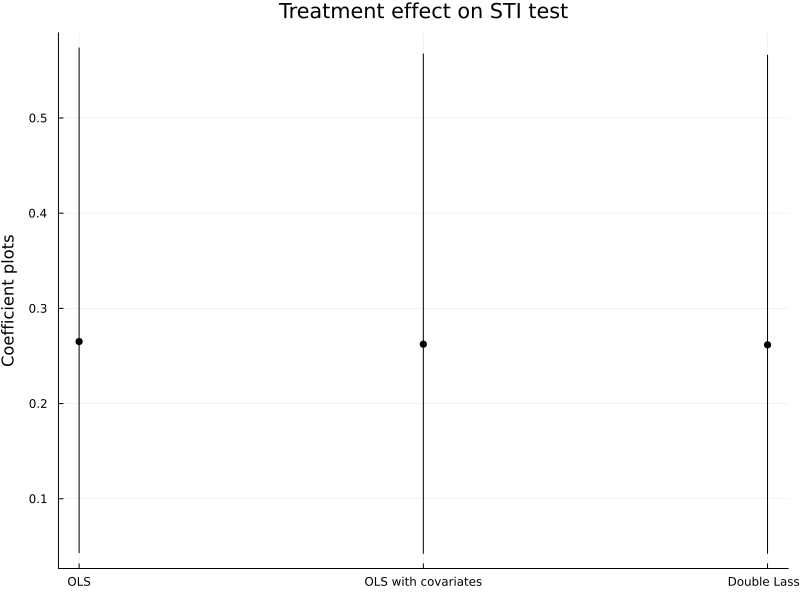

In [12]:
#----------------#
#---Results------#
#----------------#
methods = ["OLS", "OLS with covariates", "Double Lasso"]
betas = [b1, b2, b3]
ll = [ci1[1], ci2[1], ci3[1]]
ul = [ci1[2], ci2[2], ci3[2]]

plt = Plots.plot(size=(800, 600), legend=false)
for (i, method) in enumerate(methods)
    scatter!([i], [betas[i]], label=false, color="black")
    plot!([i, i], [betas[i] - ll[i], betas[i] + ul[i]], color="black", label=false)
end

xticks!(1:length(methods), methods)
title!("Treatment effect on STI test")
ylabel!("Coefficient plots")
display(plt)

From all three estimations, linear regressions with covariates yield the lowest standard error (0.0217321) and a point estimate of 0.262343. Point estimates are pretty much similar across methods. 

# Q3 - Non-Linear Methods DML

In [13]:
import Pkg
Pkg.add("GR")
Pkg.add("MLDataUtils")
Pkg.add("FixedEffectModels")
Pkg.add("DecisionTree")
Pkg.add("StatsBase")
Pkg.add("MLBase")
Pkg.add("Random")
Pkg.add("GLMNet")

using GR
using MLDataUtils
using FixedEffectsModels
using DecisionTree
using StatsBase
using MLBase
using Random
using GLMNet

   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`
   Resolvi

LoadError: ArgumentError: Package FixedEffectsModels not found in current path.
- Run `import Pkg; Pkg.add("FixedEffectsModels")` to install the FixedEffectsModels package.

Defining poly function

In [15]:
# We define the `poly` function as provided by the documentation of the `StatsModels` package:
# syntax: best practice to define a _new_ function
poly(x, n) = x^n

# type of model where syntax applies: here this applies to any model type
const POLY_CONTEXT = Any

# struct for behavior
struct PolyTerm{T,D} <: AbstractTerm
    term::T
    deg::D
end

Base.show(io::IO, p::PolyTerm) = print(io, "poly($(p.term), $(p.deg))")

# for `poly` use at run-time (outside @formula), return a schema-less PolyTerm
poly(t::Symbol, d::Int) = PolyTerm(term(t), term(d))

# for `poly` use inside @formula: create a schemaless PolyTerm and apply_schema
function StatsModels.apply_schema(t::FunctionTerm{typeof(poly)},
                                  sch::StatsModels.Schema,
                                  Mod::Type{<:POLY_CONTEXT})
    apply_schema(PolyTerm(t.args_parsed...), sch, Mod)
end

# apply_schema to internal Terms and check for proper types
function StatsModels.apply_schema(t::PolyTerm,
                                  sch::StatsModels.Schema,
                                  Mod::Type{<:POLY_CONTEXT})
    term = apply_schema(t.term, sch, Mod)
    isa(term, ContinuousTerm) ||
        throw(ArgumentError("PolyTerm only works with continuous terms (got $term)"))
    isa(t.deg, ConstantTerm) ||
        throw(ArgumentError("PolyTerm degree must be a number (got $t.deg)"))
    PolyTerm(term, t.deg.n)
end

function StatsModels.modelcols(p::PolyTerm, d::NamedTuple)
    col = modelcols(p.term, d)
    reduce(hcat, [col.^n for n in 1:p.deg])
end

# the basic terms contained within a PolyTerm (for schema extraction)
StatsModels.terms(p::PolyTerm) = terms(p.term)
# names variables from the data that a PolyTerm relies on
StatsModels.termvars(p::PolyTerm) = StatsModels.termvars(p.term)
# number of columns in the matrix this term produces
StatsModels.width(p::PolyTerm) = p.deg

StatsBase.coefnames(p::PolyTerm) = coefnames(p.term) .* "^" .* string.(1:p.deg)

# output

In [16]:
#Constructing the Data

#formula_flex = @formula(net_tfa ~ e401 + poly(age, 6) + poly(inc, 8) + poly(educ, 4) + poly(fsize, 2) + marr + twoearn + db + pira + hown);
formula_flex = @formula(y ~ w + gender_male + ethnicgrp_white + partners1 + poly(age, 6) + poly(imd_decile, 2));
formula_flex = apply_schema(formula_flex, schema(data));
y, x = modelcols(formula_flex, data);
y = Float64.(y)
d = x[:, 1];
x = x[:, Not(1)];
size(x, 2)

11

#### (3.1) DML - Lasso

In [17]:
using MLDataUtils, MLBase, Random, FixedEffectModels, GLMNet
function DML2_for_PLM(x , d , y, dreg , yreg , nfold)
    
    # Num ob observations
    nobser = size(x,1)
    
    # Define folds indices 
    foldid = collect(Kfold(size(x)[1], nfold))
    
    # Create array to save errors 
    ytil = ones(nobser)
    dtil = ones(nobser)
    
    dl = convert(Matrix{Float64}, [(d .< 0.5) (d .>= 0.5)])
    
    # loop to save results
    for i in 1:nfold
        
        # Lasso regression, excluding folds selected 
        dfit = dreg(x[foldid[i],:], dl[foldid[i], :])
        yfit = yreg(x[foldid[i],:], y[foldid[i]])
        
        # Predict estimates using the 
        dhat = GLMNet.predict(dfit, x[Not(foldid[i]),:], outtype = :prob)
        yhat = GLMNet.predict(yfit, x[Not(foldid[i]),:])
        
        # Save errors 
        dtil[Not(foldid[i])] = (d[Not(foldid[i])] - dhat)
        ytil[Not(foldid[i])] = (y[Not(foldid[i])] - yhat)
    end
    
    # Create dataframe 
    data = DataFrame(ytil = ytil, dtil = dtil)
    
    # OLS clustering at the County level
    rfit = fit(LinearModel, reshape(dtil, nobser, 1), ytil)
    # coef_est = coef(rfit)[2]
    # se = FixedEffectModels.coeftable(rfit).cols[2][2]

    # println(" coef (se) = ", coef_est ,"(",se,")")
    
    return rfit, data;
    
end

DML2_for_PLM (generic function with 1 method)

In [18]:
Random.seed!(123)
dreg(x,d) = glmnetcv(x, d, nfolds = 5, Binomial())
yreg(x,y) = glmnetcv(x, y, nfolds = 5)
lasso_fit, lasso_data = DML2_for_PLM(x, d, y, dreg, yreg, 3);
lasso_fit

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
───────────────────────────────────────────────────────────────
       Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────
x1  0.263103   0.0217198  12.11    <1e-31   0.220504   0.305703
───────────────────────────────────────────────────────────────


Interpretation: those in the treatment group had their probability of taking a STI test increase by 0.263pp. This effect is significant at the 99% confidence level. 

In [19]:
# cross-fitted RMSE: outcome
lasso_y_rmse = sqrt(mean((lasso_data[!, 1] .- StatsBase.coef(lasso_fit)[1] * lasso_data[!, 2]) .^ 2))

# cross-fitted RMSE: treatment
lasso_d_rmse = sqrt(mean(lasso_data[!, 2] .^ 2));
println(lasso_d_rmse)

# cross-fitted ce: treatment
mean(ifelse.(d .- lasso_data[!, 2] .> 0.5, 1, 0) .!= d)

0.4992469547490762


0.4703852788959172

#### (3.2) DML - Regression Trees

In [20]:
using DecisionTree
function DML2_Tree(z , d , y, dreg , yreg , nfold)
    
    # Num ob observations
    nobser = size(z,1)
    
    # Define folds indices
    foldid = collect(Kfold(size(z)[1], nfold))
    
    # Create array to save errors 
    ytil = ones(nobser)
    dtil = ones(nobser)
    
    # loop to save results
    for i in 1:nfold
        dfit = dreg(z[foldid[i],:], d[foldid[i]])
        yfit = yreg(z[foldid[i],:], y[foldid[i]])
        dhat = apply_tree(dfit,z[Not(foldid[i]),:])
        yhat = apply_tree(yfit,z[Not(foldid[i]),:])
        dtil[Not(foldid[i])]   = (d[Not(foldid[i])] - dhat)
        ytil[Not(foldid[i])]   = (y[Not(foldid[i])] - yhat)
    end
    
    # Create dataframe 
    data = DataFrame(ytil = ytil, dtil = dtil)
    
    # OLS clustering at the County level
    rfit = fit(LinearModel, reshape(dtil, nobser, 1), ytil)
    # coef_est = coef(rfit)[1]
    # se = FixedEffectModels.coeftable(rfit).cols[2]

    # println(" coef (se) = ", coef_est ,"(",se,")")
    
    return rfit, data;
    
end

DML2_Tree (generic function with 1 method)

In [21]:
Random.seed!(123)

dreg(x, d) = build_tree(d, x, 0, 30, 7, 20, 0.01)
yreg(x, y) = build_tree(y, x, 0, 30, 7, 20, 0.01)

tree_fit, tree_data = DML2_Tree(x, d, y, dreg, yreg, 3);
tree_fit

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
──────────────────────────────────────────────────────────────
       Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────
x1  0.140561   0.0163659  8.59    <1e-16   0.108462    0.17266
──────────────────────────────────────────────────────────────


Interpretation: those in the treatment group had their probability of taking a STI test increase by 0.141pp. This effect is significant at the 99% confidence level. 

In [22]:
tree_y_rmse = sqrt(mean((tree_data[!, 1] .- StatsBase.coef(tree_fit)[1] * tree_data[!, 2]) .^ 2))
tree_d_rmse = sqrt(mean(tree_data[!, 2] .^ 2))

println(tree_y_rmse)
println(tree_d_rmse)
mean(ifelse.(d .- tree_data[!, 2] .> 0.5, 1, 0) .!= d)

0.46794092935138426
0.6858463959925117


0.4703852788959172

#### (3.3) Boosting Trees

In [23]:
import Pkg
Pkg.add("XGBoost")
using XGBoost

function DML2_Boost(z , d , y, dreg , yreg , nfold)
    
    # Num ob observations
    nobser = size(z,1)
    
    # Define folds indices
    foldid = collect(Kfold(size(z)[1], nfold))
    
    # Create array to save errors 
    ytil = ones(nobser)
    dtil = ones(nobser)
    
    # loop to save results
    for i in 1:nfold
        dfit = dreg(z[foldid[i], :], d[foldid[i]])
        yfit = yreg(z[foldid[i], :], y[foldid[i]])
        dhat = XGBoost.predict(dfit, z[Not(foldid[i]), :])
        yhat = XGBoost.predict(yfit, z[Not(foldid[i]), :])
        dtil[Not(foldid[i])]   = (d[Not(foldid[i])] - dhat)
        ytil[Not(foldid[i])]   = (y[Not(foldid[i])] - yhat)
    end
    
    # Create dataframe 
    data = DataFrame(ytil = ytil, dtil = dtil)
    
    # OLS clustering at the County level
    rfit = fit(LinearModel, reshape(dtil, nobser, 1), ytil)
    # coef_est = coef(rfit)[1]
    # se = FixedEffectModels.coeftable(rfit).cols[2]

    # println(" coef (se) = ", coef_est ,"(",se,")")
    
    return rfit, data;
    
end

   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`


DML2_Boost (generic function with 1 method)

In [25]:
Random.seed!(123)

dreg(x, d) = xgboost(x, 5, label = d, objective = "binary:logistic", eval_metric = "logloss");
yreg(x, y) = xgboost(x, 5, label = y);

boost_fit, boost_data = DML2_Boost(x, d, y, dreg, yreg, 3);
#boost_fit

[ Info: XGBoost: starting training.
┌ Warning: [22:40:09] WARNING: /workspace/srcdir/xgboost/src/learner.cc:742: 
│ Parameters: { "label" } are not used.
└ @ XGBoost C:\Users\ALBERTO TRELLES\.julia\packages\XGBoost\nqMqQ\src\XGBoost.jl:34


LoadError: MethodError: no method matching updateone!(::Booster, ::DMatrix, ::Int64; round_number::Int64, watchlist::Dict{String, DMatrix})

[0mClosest candidates are:
[0m  updateone!(::Booster, ::DMatrix, ::Any, [91m::Any[39m; kw...)
[0m[90m   @[39m [35mXGBoost[39m [90mC:\Users\ALBERTO TRELLES\.julia\packages\XGBoost\nqMqQ\src\[39m[90m[4mbooster.jl:408[24m[39m
[0m  updateone!(::Booster, ::Any, ::Any, [91m::Any[39m; kw...)
[0m[90m   @[39m [35mXGBoost[39m [90mC:\Users\ALBERTO TRELLES\.julia\packages\XGBoost\nqMqQ\src\[39m[90m[4mbooster.jl:415[24m[39m
[0m  updateone!(::Booster, ::DMatrix; round_number, watchlist, update_feature_names)
[0m[90m   @[39m [35mXGBoost[39m [90mC:\Users\ALBERTO TRELLES\.julia\packages\XGBoost\nqMqQ\src\[39m[90m[4mbooster.jl:369[24m[39m
[0m  ...


In [26]:
boost_y_rmse = sqrt(mean((boost_data[!, 1] .- StatsBase.coef(boost_fit)[1] * boost_data[!, 2]) .^ 2))
boost_d_rmse = sqrt(mean(boost_data[!, 2] .^ 2))

println(boost_y_rmse)

println(boost_d_rmse)

mean(ifelse.(d .- boost_data[!, 2] .> 0.5, 1, 0) .!= d)

LoadError: UndefVarError: `boost_data` not defined

We couldn't run boosted trees

#### (3.4) DML - Random Forest

In [27]:
using DecisionTree
function DML2_RF(z , d , y, dreg , yreg , nfold)
    
    # Num ob observations
    nobser = size(z,1)
    
    # Define folds indices
    foldid = collect(Kfold(size(z)[1], nfold))
    
    # Create array to save errors 
    ytil = ones(nobser)
    dtil = ones(nobser)
    
    # loop to save results
    for i in 1:nfold
        dfit = dreg(z[foldid[i],:], d[foldid[i]])
        yfit = yreg(z[foldid[i],:], y[foldid[i]])
        dhat = apply_forest(dfit,z[Not(foldid[i]),:])
        yhat = apply_forest(yfit,z[Not(foldid[i]),:])
        dtil[Not(foldid[i])]   = (d[Not(foldid[i])] - dhat)
        ytil[Not(foldid[i])]   = (y[Not(foldid[i])] - yhat)
    end
    
    # Create dataframe 
    data = DataFrame(ytil = ytil, dtil = dtil)
    
    # OLS clustering at the County level
    # rfit = reg(data, @formula(ytil ~ dtil))
    rfit = fit(LinearModel, reshape(dtil, nobser, 1), ytil)
    # coef_est = coef(rfit)[1]
    # se = FixedEffectModels.coeftable(rfit).cols[2]

    # println(" coef (se) = ", coef_est ,"(",se,")")
    
    return rfit, data;
    
end

DML2_RF (generic function with 1 method)

In [28]:
foldid = collect(Kfold(size(x)[1], 3))

3-element Vector{Any}:
 [1, 3, 7, 8, 9, 10, 11, 12, 13, 15  …  1722, 1725, 1726, 1728, 1729, 1730, 1733, 1734, 1735, 1738]
 [1, 2, 3, 4, 5, 6, 10, 12, 14, 15  …  1727, 1728, 1730, 1731, 1732, 1733, 1736, 1737, 1738, 1739]
 [2, 4, 5, 6, 7, 8, 9, 11, 13, 14  …  1726, 1727, 1729, 1731, 1732, 1734, 1735, 1736, 1737, 1739]

In [29]:
Random.seed!(123)

dreg(x, d) = build_forest(d, x)
yreg(x, y) = build_forest(y, x)

rf_fit, rf_data = DML2_RF(x, d, y, dreg, yreg, 3);
rf_fit

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
──────────────────────────────────────────────────────────────
       Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────
x1  0.138326   0.0161728  8.55    <1e-16   0.106606   0.170046
──────────────────────────────────────────────────────────────


Interpretation: those in the treatment group had their probability of taking a STI test increase by 0.138pp. This effect is significant at the 99% confidence level. 

In [30]:
rf_y_rmse = sqrt(mean((rf_data[!, 1] .- StatsBase.coef(rf_fit)[1] * rf_data[!, 2]) .^ 2))
rf_d_rmse = sqrt(mean(rf_data[!, 2] .^ 2))

println(rf_y_rmse)
println(rf_d_rmse)
mean(ifelse.(d .- rf_data[!, 2] .> 0.5, 1, 0) .!= d)

0.4685976686946561
0.6950080774473623


0.48303622771707877

#### Results

In [31]:
#DataFrame(Statistic = ["Estimate", "Std.Error", "RMSE Y", "RMSE D"], 
#    Lasso = [StatsBase.coef(lasso_fit)[1], sqrt(vcov(lasso_fit)[1]), lasso_y_rmse, lasso_d_rmse], 
#    RF = [StatsBase.coef(rf_fit)[1], sqrt(vcov(rf_fit)[1]), rf_y_rmse, rf_d_rmse], 
#    Trees = [StatsBase.coef(tree_fit)[1], sqrt(vcov(tree_fit)[1]), tree_y_rmse, tree_d_rmse], 
#    Boosting = [StatsBase.coef(boost_fit)[1], sqrt(vcov(boost_fit)[1]), boost_y_rmse, boost_d_rmse])

DataFrame(Statistic = ["Estimate", "Std.Error", "RMSE Y", "RMSE D"], 
    Lasso = [StatsBase.coef(lasso_fit)[1], sqrt(vcov(lasso_fit)[1]), lasso_y_rmse, lasso_d_rmse], 
    RF = [StatsBase.coef(rf_fit)[1], sqrt(vcov(rf_fit)[1]), rf_y_rmse, rf_d_rmse], 
    Trees = [StatsBase.coef(tree_fit)[1], sqrt(vcov(tree_fit)[1]), tree_y_rmse, tree_d_rmse])

Row,Statistic,Lasso,RF,Trees
,String,Float64,Float64,Float64
1,Estimate,0.263103,0.138326,0.140561
2,Std.Error,0.0217198,0.0161728,0.0163659
3,RMSE Y,0.452059,0.468598,0.467941
4,RMSE D,0.499247,0.695008,0.685846


Eventhough the standard error isn't the lowest, we choose Lasso as the RMSE is the lowest when it comes to learning Y on X and D on X. 

#### Plots

In [48]:
import Pkg; Pkg.add("Plots")
using Plots

methods = ["Lasso", "RF", "Trees"]
betas = [StatsBase.coef(lasso_fit)[1], StatsBase.coef(rf_fit)[1], StatsBase.coef(tree_fit)[1]]

#Betas and SE
b1 = StatsBase.coef(lasso_fit)[1]
b2 = StatsBase.coef(rf_fit)[1] 
b3 = StatsBase.coef(tree_fit)[1]
betas = [b1, b2, b3]

se1 = sqrt(vcov(lasso_fit)[1])
se2 = sqrt(vcov(rf_fit)[1])
se3 = sqrt(vcov(tree_fit)[1])

#Confidence Intervals (95% confidence level)
ll = [b1 - 1.96*se1, b2 - 1.96*se2, b3 - 1.96*se3]
ul = [b1 + 1.96*se1, b2 + 1.96*se2, b3 + 1.96*se3]

plt = plot(size=(800, 600), legend=false)
for (i, method) in enumerate(methods)
    scatter!([i], [betas[i]], label=false, color="black")
    plot!([i, i], [betas[i] - ll[i], betas[i] + ul[i]], color="black", label=false)
end

xticks!(1:length(methods), methods)
title!("Treatment effect on STI test")
ylabel!("Coefficient plots")
display(plt)

   Resolving package versions...
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ALBERTO TRELLES\.julia\environments\v1.10\Manifest.toml`


LoadError: UndefVarError: `plot` not defined

No idea why it doesn't run. It did run in question 2